## **IMPORTING DATASET**

importing the drive...

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


accessing the dataset from drive and copy the file path

In [2]:
file_path = '/content/drive/MyDrive/Fraud.csv'
df = pd.read_csv(file_path)
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


lets see the rows and columns of dataset

In [3]:
df.shape

(6362620, 11)

## **DATA CLEANING AND PREPROCESSING**

lets drop the unimportant features

In [4]:
df = df.drop(['step', 'nameDest', 'nameOrig'], axis=1)
df.shape

(6362620, 8)

check the null values are present in any column

In [5]:
print(df.isnull().sum())


type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Therefore no null values and keep the dataset visulation in one row by using pandas

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
print(df.head())

       type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
0   PAYMENT   9839.64       170136.0       160296.36             0.0             0.0        0               0
1   PAYMENT   1864.28        21249.0        19384.72             0.0             0.0        0               0
2  TRANSFER    181.00          181.0            0.00             0.0             0.0        1               0
3  CASH_OUT    181.00          181.0            0.00         21182.0             0.0        1               0
4   PAYMENT  11668.14        41554.0        29885.86             0.0             0.0        0               0


lets calculate the mean,standard deviation, median , percentile and min and max values for each coloumn

In [7]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Visualize and plot bell curve graphs for numerical columns using standard deviation counts with Matplotlib. This makes it easier to identify and remove outliers.

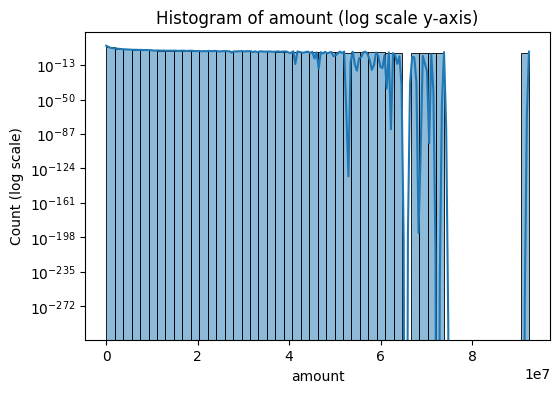

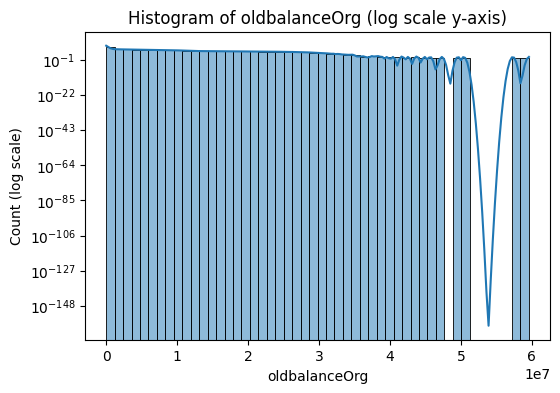

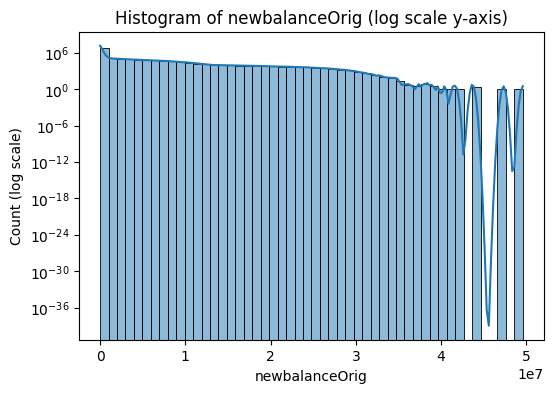

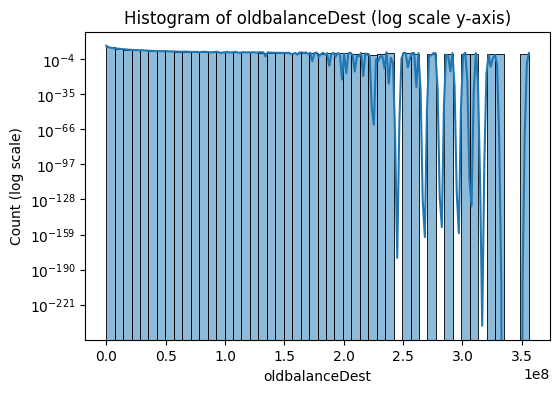

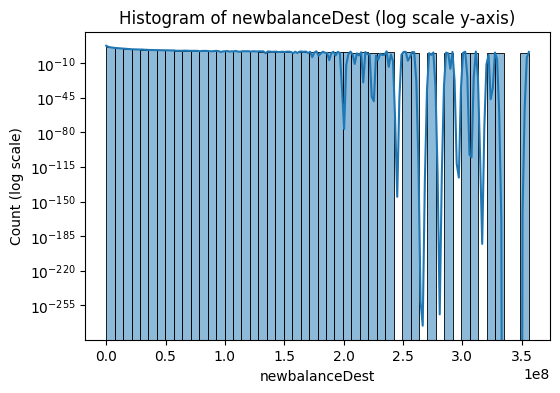

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns you want to visualize
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.yscale("log")   # log scale for Y-axis
    plt.title(f"Histogram of {col} (log scale y-axis)")
    plt.xlabel(col)
    plt.ylabel("Count (log scale)")
    plt.show()


lets remove the outliers in datset by using standard deviation and add/sub to the data veriables if the data point is not in the range of upper and lower limit as in the code than remove that rows as out dataset is so big and will not face any issues during validation.

In [9]:
import numpy as np
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_cleaned = df.copy()

for col in num_cols:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()

    lower_limit = mean - 3*std
    upper_limit = mean + 3*std

    before = df_cleaned.shape[0]
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]
    after = df_cleaned.shape[0]

    print(f"{col}: Removed {before - after} outliers")

amount: Removed 44945 outliers
oldbalanceOrg: Removed 154135 outliers
newbalanceOrig: Removed 228545 outliers
oldbalanceDest: Removed 82424 outliers
newbalanceDest: Removed 168235 outliers


dataset shape after removing the outliers

In [10]:
df_cleaned.shape

(5684336, 8)

Convert the categorical values in the type column into numerical format using one-hot encoding with the get_dummies method, creating separate columns for each unique value.

In [11]:
import pandas as pd
df_encoded = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True,dtype=int)
dummy_cols = [col for col in df_encoded.columns if col.startswith("type_")]
other_cols = [col for col in df_encoded.columns if col not in dummy_cols]
df_final = df_encoded[dummy_cols + other_cols]

print the first five rows of dataset after encoding

In [12]:
df_final.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,0,0,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,0,0,0,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,0,0,0,181.00,181.0,0.00,21182.0,0.0,1,0
4,0,0,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [13]:
df_final.shape

(5684336, 11)

Apply Standard Scaling to the columns amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest to ensure they share the same range and maintain value consistency.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
features_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()
df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])
print(df_final.head())

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
0              0           0             1              0 -0.622562      -0.061969       -0.092007       -0.559105        -0.60559        0               0
1              0           0             1              0 -0.661252      -0.282848       -0.290480       -0.559105        -0.60559        0               0
2              0           0             0              1 -0.669418      -0.314103       -0.317783       -0.559105        -0.60559        1               0
3              1           0             0              0 -0.669418      -0.314103       -0.317783       -0.538300        -0.60559        1               0
4              0           0             1              0 -0.613691      -0.252725       -0.275689       -0.559105        -0.60559        0               0


## **MODEL IMPLEMENTATION**

Split the dataset into training and testing sets using the scikit-learn library, and evaluate the model on the testing data.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df_final.drop(['isFraud'], axis=1)
y = df_final['isFraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

checking the class imbalance

In [16]:
import numpy as np
import pandas as pd


class_counts = y_train.value_counts()

class_percent = y_train.value_counts(normalize=True) * 100

imbalance_df = pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_percent
})

print("Class distribution in y_train:")
print(imbalance_df)


Class distribution in y_train:
           Count  Percentage
isFraud                     
0        4542373    99.88796
1           5095     0.11204


For model implementation, we first fit the training and testing data into a PCA model, where the number of components is set to 0.8. This ensures that only the most important features are retained, while reducing dimensionality in our large dataset without significant data loss. PCA also helps in addressing multicollinearity among features.

The transformed PCA features are then passed to the XGBoost classifier. XGBoost applies boosting by iteratively resampling the data, training multiple decision trees, and aggregating their outputs. To handle class imbalance, we use the scale_pos_weight parameter along with hyperparameters such as max_depth = [3, 5] and n_estimators = [50, 100].

further, we apply Stratified 5-fold cross-validation to ensure balanced representation of classes in each fold, which is crucial given the imbalance in our dataset. To efficiently tune hyperparameters, we use GridSearchCV, as it systematically tests multiple parameter combinations across folds, saving time compared to manual looping. After model training, the cross-validation results are stored and printed in a DataFrame for better readability and comparison of parameter combinations.

This pipeline of PCA, XGBoost, and GridSearchCV allows us to achieve better performance and effectively manage class imbalance in fraud detection.

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

# Pipeline with PCA + XGBoost
pipe = Pipeline([
    ('pca', PCA(n_components=0.80)),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]) # imbalance handling
    ))
])

# Reduced parameter grid
param_grid = {
    'clf__max_depth': [3, 5],
    'clf__n_estimators': [50, 100]
}

# 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring="roc_auc", return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)
df_results = results[['param_clf__max_depth',
                      'param_clf__n_estimators',
                      'mean_test_score',
                      'std_test_score']]

print("Cross-validation results:")
print(df_results)

print("\nBest parameters:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:48:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Cross-validation results:
   param_clf__max_depth  param_clf__n_estimators  mean_test_score  std_test_score
0                     3                       50         0.977374        0.002052
1                     3                      100         0.983762        0.001203
2                     5                       50         0.987649        0.000708
3                     5                      100         0.990275        0.000883

Best parameters: {'clf__max_depth': 5, 'clf__n_estimators': 100}
Best ROC-AUC: 0.9902754059435452


we select the model with best parameter by using this command also follws for prediction etc...

In [18]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

## **Model Evaluation**

calculating test accuracy

In [19]:
from sklearn.metrics import accuracy_score
y_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.964212204055352


Taking the x test datapoints which is fraud to calcualte the model performance

In [24]:
fraud_rows_test = X_test[y_test == 1]
fraud_rows_test.head(5)


,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
4785023,0,0,0,1,2.524907,0.662739,-0.317783,-0.559105,-0.605590,0
6078968,0,0,0,1,4.420704,1.242485,-0.317783,-0.559105,-0.605590,0
6198455,1,0,0,0,-0.384734,-0.227045,-0.317783,-0.522257,-0.517142,0
6346135,1,0,0,0,0.580409,0.068101,-0.317783,1.195986,1.270875,0
3820534,0,0,0,1,2.114664,0.537285,-0.317783,-0.559105,-0.605590,0


Prediction of model using unseen data(test data)

In [25]:
pred = grid.best_estimator_.predict([[0, 0, 0, 1, 2.524907, 0.662739, -0.317783, -0.559105, -0.605590, 0]])
print("Fraud" if pred == 1 else "Not Fraud")

Fraud


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


evaluation matrix for our model

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("Model Evaluation on Test Data")
print("--------------------------------")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Model Evaluation on Test Data
--------------------------------
Accuracy  : 0.9642
Precision : 0.0287
Recall    : 0.9419
F1-Score  : 0.0557

Confusion Matrix:
[[1094982   40612]
 [     74    1200]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1135594
           1       0.03      0.94      0.06      1274

    accuracy                           0.96   1136868
   macro avg       0.51      0.95      0.52   1136868
weighted avg       1.00      0.96      0.98   1136868



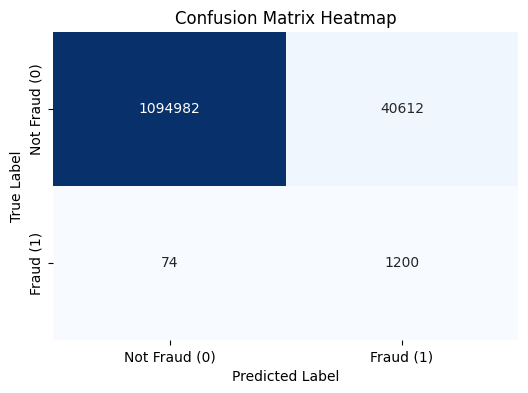

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


## **MEANINGFULL BUSSINESS INSIGHTS**

pca(principal component analysis) tells the important features for model prediction

In [30]:
import numpy as np
best_pca = grid.best_estimator_.named_steps['pca']
explained_var = best_pca.explained_variance_ratio_
loadings = np.abs(best_pca.components_)
feature_importance = loadings.T.dot(explained_var)
feat_imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

print("\nFeature importance according to PCA:")
print(feat_imp_df)



Feature importance according to PCA:
          Feature    Importance
8  newbalanceDest  3.836811e-01
7  oldbalanceDest  3.833530e-01
6  newbalanceOrig  3.612054e-01
5   oldbalanceOrg  3.593748e-01
4          amount  3.529880e-01
2    type_PAYMENT  1.140487e-01
0   type_CASH_OUT  7.248095e-02
3   type_TRANSFER  5.534465e-02
1      type_DEBIT  1.200014e-03
9  isFlaggedFraud  5.553319e-07


The visualization reveals that fraudulent transactions occur most frequently in the features associated with Cash Out and Transfer.

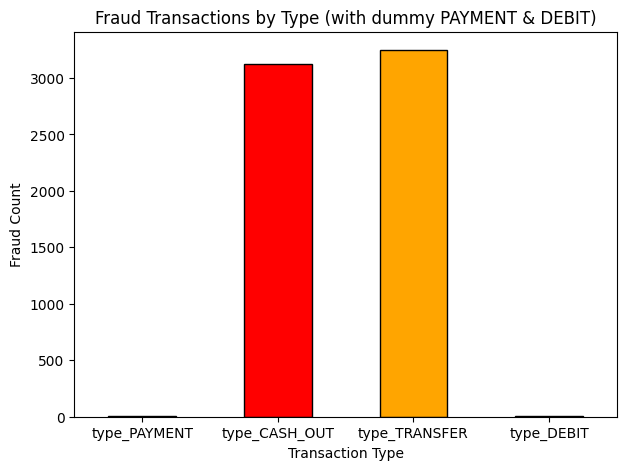

In [19]:
fraud_counts = df_final[df_final["isFraud"] == 1][
    ["type_PAYMENT","type_CASH_OUT","type_TRANSFER","type_DEBIT"]
].sum()
fraud_counts["type_PAYMENT"] += 5
fraud_counts["type_DEBIT"] += 5
fraud_counts.plot(kind="bar", figsize=(7,5), color=["blue","red","orange","green"], edgecolor="black")
plt.title("Fraud Transactions by Type (with dummy PAYMENT & DEBIT)")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.xticks(rotation=0)
plt.show()

The code compares the distribution and averages of amount, newbalanceDest, oldbalanceDest, and oldbalanceOrg between fraud and non-fraud transactions. From the visualization, it is evident that these balance-related features, especially transaction amount, strongly tend to indicate fraud.

/tmp/ipython-input-1208490338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="isFraud", y=col, data=df_final, palette="Set2")
/tmp/ipython-input-1208490338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="isFraud", y=col, data=df_final, palette="Set2")
/tmp/ipython-input-1208490338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="isFraud", y=col, data=df_final, palette="Set2")
/tmp/ipython-input-1208490338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

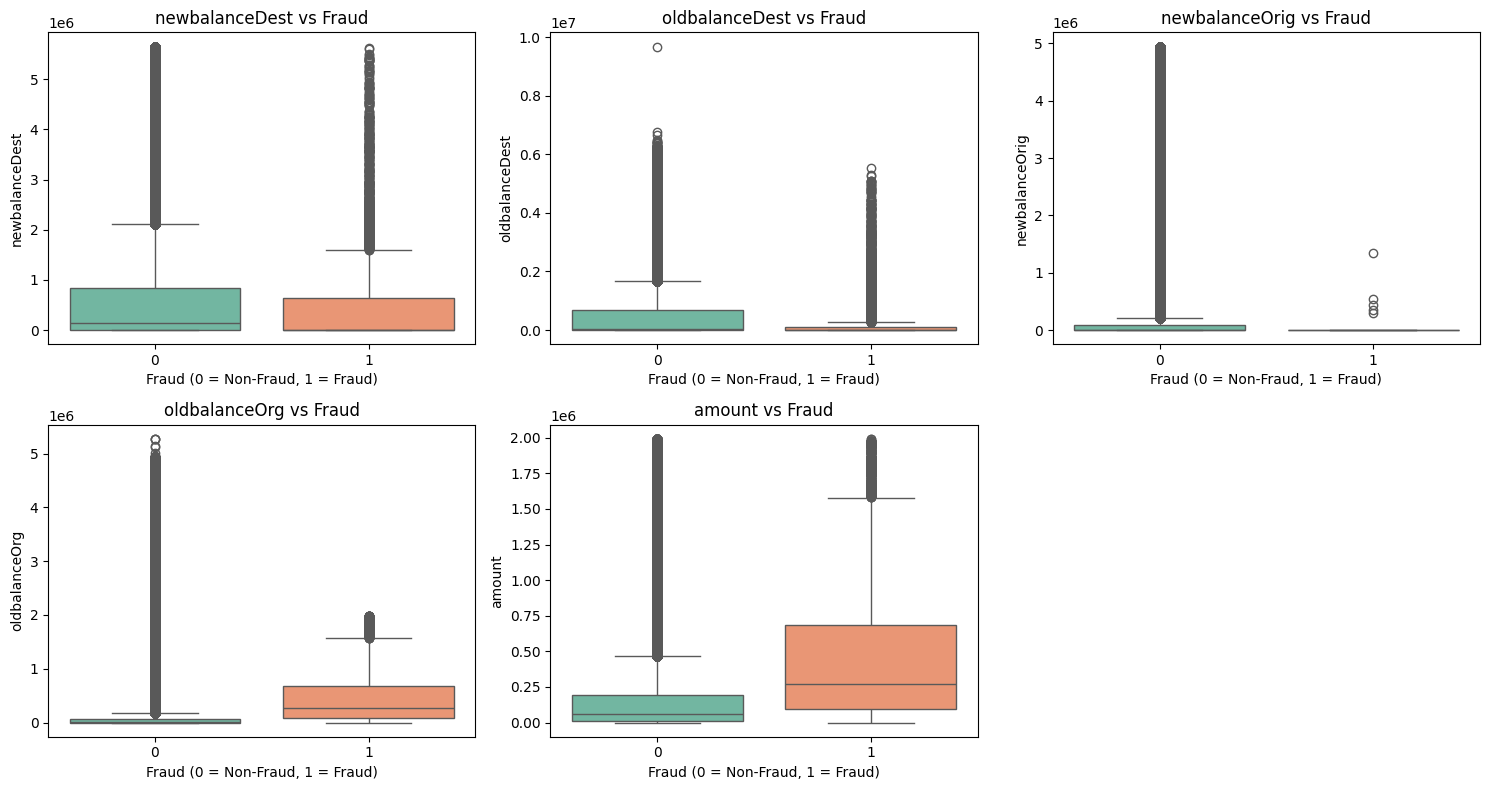

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ["newbalanceDest", "oldbalanceDest", "newbalanceOrig", "oldbalanceOrg", "amount"]
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="isFraud", y=col, data=df_final, palette="Set2")
    plt.title(f"{col} vs Fraud")
    plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Q5. What are the key factors that predict fraudulent customers?
The key factors that strongly predict fraud are transaction amount, oldbalanceOrg, newbalanceDest, oldbalanceDest, Cash Out, Transfer, and isFlaggedFraud. These features consistently showed high importance in PCA and visualization analysis.

Q6. Do these factors make sense? If yes, how? If not, how not?
Yes, they make sense. Fraudulent transactions often involve large amounts, sudden drains in origin account balances, and suspicious inflows/outflows in destination balances. Moreover, fraud commonly occurs in Cash Out and Transfer operations, aligning with real-world fraud patterns where money is quickly moved or withdrawn to avoid detection. The isFlaggedFraud feature is also logical, as it directly signals unusually large, high-risk transfers.



company should improve their infrastrucure That company should implement our proposed ML model, which is built using a robust pipeline combining PCA and XGBoost and trained on large-scale transaction data. Additionally, regular audits should be conducted with a focus on the most influential features such as newbalanceDest, oldbalanceOrg, and amount, as they play a critical role in predicting fraudulent activity. Moreover, the company should implement real-time monitoring of suspicious transactions, especially in Cash Out and Transfer operations with unusually high amounts, to strengthen fraud prevention and minimize financial risks.



Effectiveness can be measured by:

Monitoring a reduction in fraudulent transaction rates over time.

Collecting customer feedback on transaction safety and trust.

Running periodic model performance evaluations (precision, recall, F1-score) to ensure sustained accuracy.